In [21]:
### Setup Environment ###
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Stats test
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import FastICA

# Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

df = pd.read_csv('teams_10years.csv')
print(df.shape)
df.head()

(680, 63)


,team_id,year,team,finish,weekend,prpg!,dprpg,bpm,obpm,dbpm,...,def_close2_fg%,def_close2_share,off_far2_fg%,off_far2_share,def_far2_fg%,def_far2_share,off_3pt_fg%,off_3pt_share,def_3pt_fg%,def_3pt_share
0,2015 Duke,2015,Duke,Champion,3,19.9000,19.0000,38.2000,26.2000,12.6000,...,58.5000,36.0000,34.4000,26.0000,34.2000,36.2000,38.6000,33.4000,31.4000,27.8000
1,2015 Kentucky,2015,Kentucky,Final Four,3,14.2000,20.6000,45.0000,21.2000,22.5000,...,50.1000,33.8000,34.2000,39.0000,28.7000,35.6000,34.9000,27.0000,27.0000,30.5000
2,2015 Michigan St.,2015,Michigan St.,Final Four,3,16.2000,18.3000,35.1000,22.8000,12.9000,...,56.5000,32.6000,35.6000,34.2000,31.3000,33.5000,38.6000,35.0000,31.4000,33.9000
3,2015 Wisconsin,2015,Wisconsin,Runner Up,3,24.2000,21.4000,44.9000,32.7000,18.3000,...,57.1000,31.5000,40.4000,29.6000,35.4000,42.8000,36.5000,37.3000,37.6000,25.7000
4,2015 Arizona,2015,Arizona,Elite Eight,2,14.9000,22.4000,36.2000,17.1000,19.5000,...,57.8000,26.3000,41.3000,38.5000,33.3000,42.2000,36.0000,25.9000,33.6000,31.5000


In [22]:
df.columns

Index(['team_id', 'year', 'team', 'finish', 'weekend', 'prpg!', 'dprpg', 'bpm',
       'obpm', 'dbpm', 'rank', 'kp_adjem', 'kp_adjoe', 'kp_adjde', 'miya_bpr',
       'miya_obpr', 'miya_dbpr', 'wab', 'barthag', 'adj_oe', 'adj_de', 'efg%',
       'efgd%', 'orb%', 'drb%', 'ftr', 'ftrd', 'tor', 'tord', '2p%', '2p%d',
       '3p%', '3p%d', 'blk%', 'blked%', 'ast%', 'ast%d', 'ft%', 'ft%d', '3pr',
       '3prd', 'adj_tempo', 'raw_tempo', 'size', 'height', 'exp', 'bench',
       'off_dunk_fg%', 'off_dunk_share', 'def_dunk_fg%', 'def_dunk_share',
       'off_close2_fg%', 'off_close2_share', 'def_close2_fg%',
       'def_close2_share', 'off_far2_fg%', 'off_far2_share', 'def_far2_fg%',
       'def_far2_share', 'off_3pt_fg%', 'off_3pt_share', 'def_3pt_fg%',
       'def_3pt_share'],
      dtype='object')

In [23]:
X = df[['prpg!', 'dprpg', 'bpm', 'obpm', 'dbpm', 
        'kp_adjem', 'kp_adjoe', 'kp_adjde', 
        'miya_bpr', 'miya_obpr', 'miya_dbpr', 
        'wab', 'barthag', 'adj_oe', 'adj_de', 'efg%',
        'efgd%', 'orb%', 'drb%', 'ftr', 'ftrd', 'tor', 'tord', '2p%', '2p%d',
        '3p%', '3p%d', 'blk%', 'blked%', 'ast%', 'ast%d', 'ft%', 'ft%d', '3pr',
        '3prd', 'adj_tempo', 'raw_tempo', 'size', 'height', 'exp', 'bench',
        'off_dunk_fg%', 'off_dunk_share', 'def_dunk_fg%', 'def_dunk_share',
        'off_close2_fg%', 'off_close2_share', 'def_close2_fg%',
        'def_close2_share', 'off_far2_fg%', 'off_far2_share', 'def_far2_fg%',
        'def_far2_share', 'off_3pt_fg%', 'off_3pt_share', 'def_3pt_fg%',
        'def_3pt_share']]
y = df['weekend']

### I. Feature Selection

In [24]:
# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,prpg!,78.8837,0.0000,0.0988
1,dprpg,69.6137,0.0000,0.0826
2,bpm,110.0292,0.0000,0.1551
3,obpm,77.7421,0.0000,0.1091
4,dbpm,73.2217,0.0000,0.1142
5,kp_adjem,106.0109,0.0000,0.1726
6,kp_adjoe,75.4238,0.0000,0.0952
7,kp_adjde,49.1742,0.0000,0.0660
8,miya_bpr,108.3696,0.0000,0.1596
9,miya_obpr,81.0173,0.0000,0.1009


In [25]:
feature_df = stats_df[stats_df['mutual_info'] > 0]
feature_df

,feature,f_values,p_values,mutual_info
0,prpg!,78.8837,0.0000,0.0988
1,dprpg,69.6137,0.0000,0.0826
2,bpm,110.0292,0.0000,0.1551
3,obpm,77.7421,0.0000,0.1091
4,dbpm,73.2217,0.0000,0.1142
5,kp_adjem,106.0109,0.0000,0.1726
6,kp_adjoe,75.4238,0.0000,0.0952
7,kp_adjde,49.1742,0.0000,0.0660
8,miya_bpr,108.3696,0.0000,0.1596
9,miya_obpr,81.0173,0.0000,0.1009


In [26]:
feature_df = feature_df[feature_df['p_values'] < .05]
feature_df.sort_values(by='f_values', ascending=False)

,feature,f_values,p_values,mutual_info
2,bpm,110.0292,0.0000,0.1551
8,miya_bpr,108.3696,0.0000,0.1596
5,kp_adjem,106.0109,0.0000,0.1726
11,wab,104.2634,0.0000,0.1535
9,miya_obpr,81.0173,0.0000,0.1009
0,prpg!,78.8837,0.0000,0.0988
13,adj_oe,78.2315,0.0000,0.1403
3,obpm,77.7421,0.0000,0.1091
6,kp_adjoe,75.4238,0.0000,0.0952
4,dbpm,73.2217,0.0000,0.1142


In [27]:
feature_df = feature_df[feature_df['f_values'] > 5]
feature_df.sort_values(by='f_values', ascending=False)

,feature,f_values,p_values,mutual_info
2,bpm,110.0292,0.0000,0.1551
8,miya_bpr,108.3696,0.0000,0.1596
5,kp_adjem,106.0109,0.0000,0.1726
11,wab,104.2634,0.0000,0.1535
9,miya_obpr,81.0173,0.0000,0.1009
0,prpg!,78.8837,0.0000,0.0988
13,adj_oe,78.2315,0.0000,0.1403
3,obpm,77.7421,0.0000,0.1091
6,kp_adjoe,75.4238,0.0000,0.0952
4,dbpm,73.2217,0.0000,0.1142


In [28]:
feature_df.sort_values(by='mutual_info', ascending=False)

,feature,f_values,p_values,mutual_info
12,barthag,60.4209,0.0000,0.1784
5,kp_adjem,106.0109,0.0000,0.1726
8,miya_bpr,108.3696,0.0000,0.1596
2,bpm,110.0292,0.0000,0.1551
11,wab,104.2634,0.0000,0.1535
13,adj_oe,78.2315,0.0000,0.1403
4,dbpm,73.2217,0.0000,0.1142
3,obpm,77.7421,0.0000,0.1091
9,miya_obpr,81.0173,0.0000,0.1009
0,prpg!,78.8837,0.0000,0.0988


In [29]:
vars_df = df[['barthag',
              'kp_adjem',
              'miya_bpr',
              'bpm',
              'wab',
              'adj_oe',
              'prpg!',
              'dbpm',
              'obpm',
              'miya_obpr',
              'kp_adjoe',
              'miya_dbpr',
              'dprpg',
              'adj_de',
              'kp_adjde',
              'off_close2_fg%',
              'off_dunk_share',
              'efgd%',
              'tor',
              '2p%d',
              'height',
              '2p%',
              'size',
              'orb%',
              'efg%',
              'def_far2_share',
              'def_dunk_share',
              'def_3pt_fg%',
              '3p%',
              'blk%',
              'bench'
           ]]

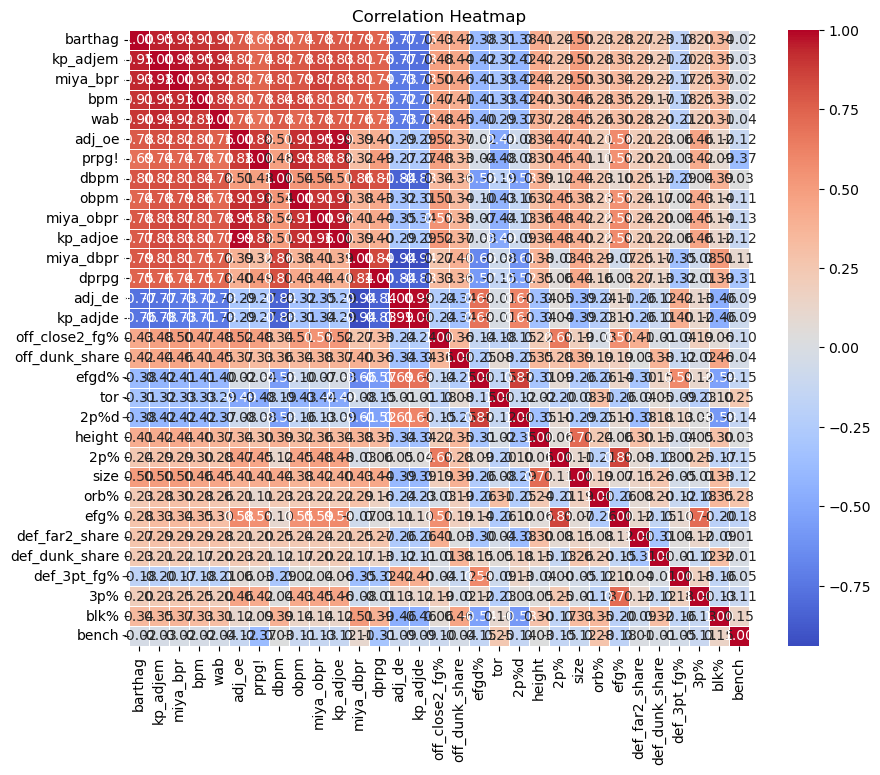

In [30]:
corr_matrix = vars_df.corr()

plt.figure(figsize=(10, 8))  # Optional: specify the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### II. Build Clustering Model

In [31]:
sc = StandardScaler()
scaled_array = sc.fit_transform(vars_df)
model_df = pd.DataFrame(scaled_array)
model_df.columns = ['barthag',
              'kp_adjem',
              'miya_bpr',
              'bpm',
              'wab',
              'adj_oe',
              'prpg!',
              'dbpm',
              'obpm',
              'miya_obpr',
              'kp_adjoe',
              'miya_dbpr',
              'dprpg',
              'adj_de',
              'kp_adjde',
              'off_close2_fg%',
              'off_dunk_share',
              'efgd%',
              'tor',
              '2p%d',
              'height',
              '2p%',
              'size',
              'orb%',
              'efg%',
              'def_far2_share',
              'def_dunk_share',
              'def_3pt_fg%',
              '3p%',
              'blk%',
              'bench']
model_df.head()

,barthag,kp_adjem,miya_bpr,bpm,wab,adj_oe,prpg!,dbpm,obpm,miya_obpr,...,2p%,size,orb%,efg%,def_far2_share,def_dunk_share,def_3pt_fg%,3p%,blk%,bench
0,1.0350,1.5890,1.8610,1.7979,1.9544,2.1448,1.8509,0.6814,2.0302,2.5303,...,1.4516,0.3025,1.5640,1.6538,1.5236,0.0557,-0.7166,1.1352,-0.5613,-0.7756
1,1.1348,2.4754,2.4044,2.4618,2.4621,1.2700,0.2691,2.4506,1.3088,1.6255,...,-0.1086,2.2429,2.2834,-0.2300,1.3930,0.0557,-2.8783,-0.2473,2.8893,1.9038
2,0.7777,0.6742,0.9413,1.4953,0.3511,0.5974,0.8241,0.7350,1.5396,0.8888,...,-0.0760,-1.2116,0.8926,0.5088,0.9359,-0.8186,-0.7166,1.1352,1.0005,0.3963
3,1.0818,2.0491,2.3222,2.4521,2.1026,2.4211,3.0441,1.7000,2.9680,2.7901,...,1.0616,2.1195,0.2452,0.8043,2.9603,-0.4824,2.3294,0.0215,-0.4524,-1.5562
4,1.0295,1.9170,2.2032,1.6027,1.6131,0.7082,0.4634,1.9145,0.7172,1.2678,...,0.5090,0.6615,0.7727,0.4349,2.8297,-1.1549,0.3642,0.1367,-0.0892,-0.0413


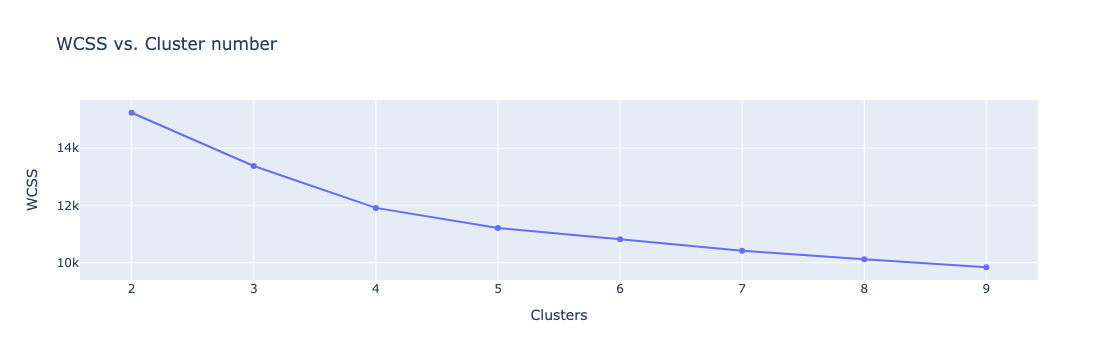

In [32]:
wcss = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = "k-means++", algorithm="lloyd",
                    max_iter = 500, n_init = 10, random_state = 123)
    kmeans.fit(model_df)
    wcss.append(kmeans.inertia_)
    
fig = go.Figure(data = go.Scatter(x = [2,3,4,5,6,7,8,9,10], y = wcss))


fig.update_layout(title='WCSS vs. Cluster number',
                   xaxis_title='Clusters',
                   yaxis_title='WCSS')
fig.show()

In [33]:
# Fit K-Means Clustering Mode
kmeans5 = KMeans(n_clusters=5, init='k-means++', algorithm='lloyd',
                 max_iter=500, random_state=123)
kmeans5.fit_predict(model_df)
df['cluster'] = kmeans5.labels_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [34]:
pd.crosstab(index=df['finish'], columns=df['cluster'])

cluster,0,1,2,3,4
finish,,,,,
Champion,0,0,0,0,9
Covid,7,30,18,7,6
Elite Eight,1,5,2,8,17
Final Four,0,3,1,6,8
First Round,78,87,91,58,12
Runner Up,0,1,0,1,7
Second Round,3,60,24,40,18
Sweet 16,1,26,0,19,26


In [74]:
# Label Tiers
df['tier'] = ''

### S Tier ###
df.loc[(df['cluster']==4) & (df['kp_adjem']>25) & (df['wab']>5) & (df['bpm']>30) & (df['rank']<=6), 'tier'] = 'S'

### A Tier ###
df.loc[(df['cluster']==4) & (df['kp_adjem']>25) & (df['wab']>5) & (df['bpm']>30) & (df['rank']>6), 'tier'] = 'A'
df.loc[(df['cluster']==4) & (df['kp_adjem']>25) & (df['wab']>5) & (df['bpm']<=30), 'tier'] = 'A'
df.loc[(df['cluster']==4) & (df['kp_adjem']>25) & (df['wab']<=5) & (df['bpm']>30), 'tier'] = 'A'
df.loc[(df['cluster']==4) & (df['kp_adjem']<=25) & (df['wab']>5) & (df['bpm']>30), 'tier'] = 'A'
df.loc[(df['cluster']==4) & (df['kp_adjem']>25) & (df['wab']<=5) & (df['bpm']<=30), 'tier'] = 'A'
df.loc[(df['cluster']==4) & (df['kp_adjem']<=25) & (df['wab']>5) & (df['bpm']<=30), 'tier'] = 'A'
df.loc[(df['cluster']==4) & (df['kp_adjem']<=25) & (df['wab']<=5) & (df['bpm']>30), 'tier'] = 'A'
df.loc[(df['cluster']==3) & (df['wab']>3) & (df['bpm']>23), 'tier'] = 'A'

### B Tier ###
df.loc[(df['cluster']==4) & (df['kp_adjem']<=25) & (df['wab']<=5) & (df['bpm']<=30), 'tier'] = 'B'
df.loc[(df['cluster']==3) & (df['wab']>3) & (df['bpm']<=23), 'tier'] = 'B'
df.loc[(df['cluster']==3) & (df['wab']<=3) & (df['bpm']>23), 'tier'] = 'B'
df.loc[(df['cluster']==1) & (df['wab']>4.2), 'tier'] = 'B'

### C Tier ###
df.loc[(df['cluster']==3) & (df['wab']<=3) & (df['bpm']<=23), 'tier'] = 'C'
df.loc[(df['cluster']==1) & (df['wab']<=4.2), 'tier'] = 'C'
df.loc[(df['cluster']==2) & (df['wab']>2.5) & (df['bpm']>20), 'tier'] = 'C'
df.loc[(df['cluster']==2) & (df['wab']<=2.5) & (df['bpm']>20), 'tier'] = 'C'
df.loc[(df['cluster']==2) & (df['wab']>2.5) & (df['bpm']<=20), 'tier'] = 'C'

### D Tier ###
df.loc[(df['cluster']==2) & (df['bpm']>10) & (df['bpm']<=20), 'tier'] = 'D'
df.loc[(df['cluster']==0) & (df['bpm']>10), 'tier'] = 'D'

### DF Tier ###
df.loc[(df['cluster']==2) & (df['bpm']<=10), 'tier'] = 'F'
df.loc[(df['cluster']==0) & (df['bpm']<=10), 'tier'] = 'F'

In [75]:
pd.crosstab(index=df['finish'], columns=df['tier'])

tier,A,B,C,D,F,S
finish,,,,,,
Champion,0,0,0,0,0,9
Covid,7,10,25,13,11,2
Elite Eight,11,7,4,1,1,9
Final Four,10,1,5,0,0,2
First Round,14,35,106,66,102,3
Runner Up,3,1,0,0,0,5
Second Round,23,27,63,21,4,7
Sweet 16,27,19,17,0,1,8
